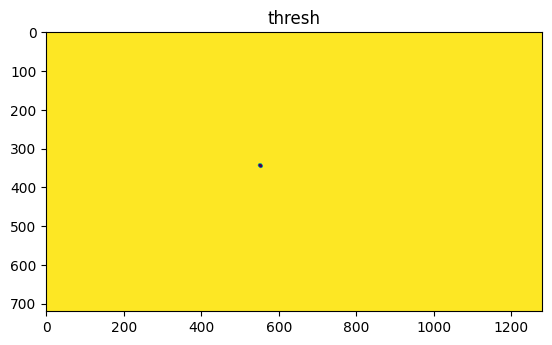

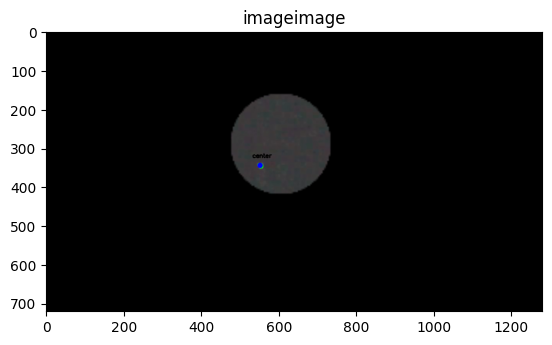

In [12]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image


df = pd.DataFrame(columns=['frame', 'area', 'x', 'y'])

def test_frame(num):

    image = cv.imread('frames/'+str(num)+'.png')
    # plt.title("image")
    # plt.imshow(image)
    # plt.show()

    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # plt.title("gray")
    # plt.imshow(gray)
    # plt.show()
    blur = cv.GaussianBlur(gray, (5, 5),cv.BORDER_DEFAULT)
    ret, thresh = cv.threshold(blur, 100, 255, cv.THRESH_BINARY_INV)
    contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    plt.title("thresh")
    plt.imshow(thresh)
    plt.show()

    if len(contours)>1 :
        M = cv.moments(contours[-2])

        if M['m00'] == cv.contourArea(contours[-2]):
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv.drawContours(image, [contours[-2]], -1, (0, 255, 0), 2)
            cv.circle(image, (cx, cy), 7, (0, 0, 255), -1)
            cv.putText(image, "center", (cx - 20, cy - 20),
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            plt.title("imageimage")
            plt.imshow(image)
            plt.show()

test_frame(100)